In [151]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


In [33]:
full_info = []
data = pd.read_csv('DS.csv')
dropping = ['row', 'col', 'central']
X = data.drop(dropping, axis=1)
y = data['central']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for iterations in range(1000, 11000, 1000):
    for lr in np.arange(0.01, 0.11, 0.01):
        for dp in range (7, 11, 1):
            info = []
            info.append(iterations)
            info.append(lr)
            info.append(dp)
            model = CatBoostRegressor(iterations=iterations, learning_rate=lr, depth=dp, loss_function='RMSE')
            model.fit(X_train, y_train, verbose=False, plot =False)
            predictions = model.predict(X_test)

            mse = mean_squared_error(y_test, predictions)
            info.append(mse)
            print(f'Mean Squared Error: {mse}')
            full_info.append(info)

Mean Squared Error: 5.222433444021634e-06
Mean Squared Error: 5.2038570389243125e-06
Mean Squared Error: 4.671391663267453e-06
Mean Squared Error: 4.434498002182909e-06
Mean Squared Error: 4.111365873194801e-06
Mean Squared Error: 3.7068781727358447e-06
Mean Squared Error: 4.032747530650184e-06
Mean Squared Error: 3.904378696239035e-06
Mean Squared Error: 4.139966422024613e-06
Mean Squared Error: 3.6829061737564917e-06
Mean Squared Error: 3.744382376140724e-06
Mean Squared Error: 3.667972411783609e-06
Mean Squared Error: 4.000304453705781e-06
Mean Squared Error: 3.3852412506061932e-06
Mean Squared Error: 3.457040427264009e-06
Mean Squared Error: 3.3344222125241566e-06
Mean Squared Error: 3.983501392384987e-06
Mean Squared Error: 3.5284130654825147e-06
Mean Squared Error: 3.42186947363999e-06
Mean Squared Error: 3.4182363757811893e-06
Mean Squared Error: 3.108071187950728e-06
Mean Squared Error: 3.919808608690359e-06
Mean Squared Error: 3.070033318817184e-06
Mean Squared Error: 3.807813

KeyboardInterrupt: 

In [35]:

min_list = min(full_info, key=lambda x: x[3])

print("Список с наименьшим четвертым значением:", min_list)

Список с наименьшим четвертым значением: [3000, 0.09, 7, 3.027294292604398e-06]


In [97]:
data = pd.read_csv('DS2.csv')
dropping = ['row', 'col', 'central']
X = data.drop(dropping, axis=1)
y = data['central']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(iterations=100000, learning_rate=0.1, depth=7, loss_function='RMSE')
model.fit(X_train, y_train, verbose=False, plot =True)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean Squared Error: 7.90382671353172e-06


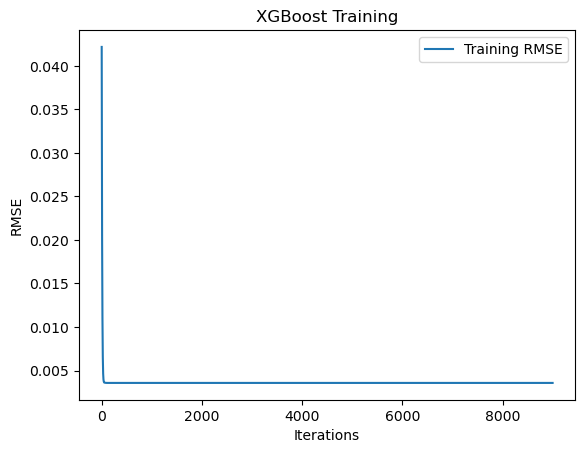

In [169]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация регрессора XGBoost
modelxgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 9000, max_depth = 7, learning_rate=0.09, random_state=42)

# Обучение модели с отслеживанием ошибки на тестовом наборе
eval_set = [(X_test, y_test)]
modelxgb.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Получение истории ошибки обучения
results = modelxgb.evals_result()

# Визуализация процесса обучения
train_errors = results['validation_0']['rmse']
plt.plot(train_errors, label='Training RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training')
plt.legend()
plt.show()


## Необходимые функции для обработки матриц

In [153]:
def max_width_spinneret(matrix_array):
    
    # Находим индексы элементов, не равных -1, для каждой строки 
    non_negative_indices = (matrix_array != -1)                          
                                                                            
    # Считаем количество элементов, не равных -1, для каждой строки      
    count_non_negative_elements = np.sum(non_negative_indices, axis=1)   
                                                                            
    # Находим индекс строки с максимальным количеством элементов, не равных -1
    max_row_index = np.argmax(count_non_negative_elements)
    max_width = count_non_negative_elements[max_row_index]
    
    return max_width

def heigh_of_col(mrx, index):
    column = mrx[:, index]
    mask = column != -1
    count_non_negative = np.sum(mask)
    return count_non_negative

def width_row(matrix_array, row):
    # Находим индексы элементов, не равных -1, в выбранной строке
    non_negative_indices_in_selected_row = (matrix_array[row] != -1)

    # Считаем количество элементов, не равных -1, в выбранной строке
    count_non_negative_elements_in_selected_row = np.sum(non_negative_indices_in_selected_row)
    
    return count_non_negative_elements_in_selected_row

def length_to_elements(matrix_array, row, column):
    selected_row_part = matrix_array[row, :column + 1]
    non_negative_indices_in_selected_row_part = (selected_row_part != -1)
    count_non_negative_elements_in_selected_row_part = np.sum(non_negative_indices_in_selected_row_part)
    
    return count_non_negative_elements_in_selected_row_part

def create_pandas_file(output_file: str):
    return pd.read_csv(output_file)

def create_matrices(columns, idx, pandas_file, step_x, step_y, matrixes):
      
    for col in columns[idx][2:4]:
        print(col)
        matrix = pd.pivot_table(pandas_file, values=col,
                                index='y',
                                columns='x',
                                fill_value=-1)
        print(matrix)
        matrixes.append(matrix.to_numpy())

In [154]:
files_name = ['Dataset_0.csv']
columns = []
step_x = 0.01
step_y = 0.01

for file in files_name:
    df = pd.read_csv(file)
    columns.append(list(df.columns))

matrixes = []
for idx, file in enumerate(files_name):
    df = create_pandas_file(file)
    create_matrices(columns, idx, df, step_x, step_y, matrixes)

mrx = np.flipud(matrixes[0])
mrx2 = np.flipud(matrixes[1])
file_path_float = 'mrx`s/mrx.txt'
np.savetxt(file_path_float, mrx, fmt='%f', delimiter='\t')
file_path_float = 'mrx`s/mrx2.txt'
np.savetxt(file_path_float, mrx, fmt='%f', delimiter='\t')   

spf.U (m/s) @ v0=0.02_y2=3E-4
x     -1.01  -1.00     -0.99     -0.98     -0.97     -0.96     -0.95  \
y                                                                      
0.00     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
0.01     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
0.02     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
0.03     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
0.04     -1     -1 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
...     ...    ...       ...       ...       ...       ...       ...   
1.96     -1      0  0.000587  0.001167  0.001743  0.002314  0.002877   
1.97     -1      0  0.000587  0.001168  0.001744  0.002315  0.002878   
1.98     -1      0  0.000587  0.001169  0.001745  0.002316  0.002880   
1.99     -1      0  0.000588  0.001169  0.001745  0.002317  0.002881   
2.00     -1      0  0.000588  0.001170  0.001746  0.002318  0.002882   

x        -0.94     -0.93     -0.9

In [181]:
empty_matrix = np.flipud((matrixes[0].copy()))
full_matrix = np.flipud((matrixes[0].copy()))
num_rows, num_cols = empty_matrix.shape

for i in range(1, num_rows):
    for j in range(num_cols):
        if empty_matrix[i, j] != -1:
            empty_matrix[i, j] = 0

file_path_float = 'empty pattern.txt'
full_path = 'full patter.txt'
# Сохранение массива с числами с плавающей запятой в текстовый файл
np.savetxt(file_path_float, empty_matrix, fmt='%f', delimiter='\t')
np.savetxt(full_path, full_matrix, fmt='%f', delimiter='\t')

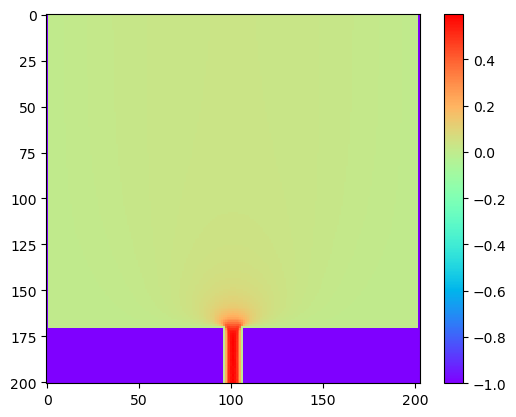

In [171]:
# Построение графика заполнения плоскости (heatmap)
plt.imshow(full_matrix, cmap='rainbow', interpolation='nearest')
plt.colorbar()  # Добавление цветовой шкалы
plt.show()

In [156]:
def process_matrix(matrix_array, emrx, ml_name):
    # Задаем форму матрицы 3x3
    max_width = max_width_spinneret(matrix_array)

    # Используем nditer для итерации по матрицам 3x3
    it = np.nditer(matrix_array, flags=['multi_index'], op_flags=['readwrite'], order='C')
    while not it.finished:
        # Получаем текущий индекс
        i, j = it.multi_index
        if matrix_array[i, j] != -1:
            width_of_row = width_row(matrix_array, i)
            length_to_element = length_to_elements(matrix_array, i, j)
            width_of_previous_row = width_row(matrix_array, i-1)
            hgt_c = heigh_of_col(mrx, j) 
            # Проверяем, что матрица 2x3 целиком помещается внутри массива
            if i - 1 >= 0 and j - 1 >= 0 and j + 1 < matrix_array.shape[1]:
                # Выполняем операции над матрицей 3x3
                submatrix = matrix_array[i - 1 : i + 1, j - 1 : j + 2]
                # Ваш код для обработки submatrix
                             
                outer = []
                d4_to_d1 = width_of_previous_row / max_width
                d2_to_d1 = width_of_row / max_width
                d3_to_d2 = length_to_element / width_of_row
                dyn_dy = (i + 1) / hgt_c 
                for x_offset, y_offset in [(0, 0), (0, 1), (0, 2)]:
                    outer_value = submatrix[x_offset, y_offset]
                    outer.append(outer_value)

                outer.append(d2_to_d1)
                outer.append(d3_to_d2)
                outer.append(d4_to_d1)    
                outer.append(dyn_dy)
                
                
                predicted_value = ml_name.predict(outer)               
                emrx[i, j] = predicted_value

                        

            # Переходим к следующему элементу с учетом шага матрицы 3x3
        it.iternext()
    return emrx

In [173]:
def process_matrixxgb(matrix_array, emrx, ml_name):
    # Задаем форму матрицы 3x3
    max_width = max_width_spinneret(matrix_array)

    # Используем nditer для итерации по матрицам 3x3
    it = np.nditer(matrix_array, flags=['multi_index'], op_flags=['readwrite'], order='C')
    while not it.finished:
        # Получаем текущий индекс
        i, j = it.multi_index
        if matrix_array[i, j] != -1:
            width_of_row = width_row(matrix_array, i)
            length_to_element = length_to_elements(matrix_array, i, j)
            width_of_previous_row = width_row(matrix_array, i-1)
            hgt_c = heigh_of_col(mrx, j) 
            # Проверяем, что матрица 2x3 целиком помещается внутри массива
            if i - 1 >= 0 and j - 1 >= 0 and j + 1 < matrix_array.shape[1]:
                # Выполняем операции над матрицей 3x3
                submatrix = matrix_array[i - 1 : i + 1, j - 1 : j + 2]
                # Ваш код для обработки submatrix
                             
                outer = []
                d4_to_d1 = width_of_previous_row / max_width
                d2_to_d1 = width_of_row / max_width
                d3_to_d2 = length_to_element / width_of_row
                dyn_dy = (i + 1) / hgt_c 
                for x_offset, y_offset in [(0, 0), (0, 1), (0, 2)]:
                    outer_value = submatrix[x_offset, y_offset]
                    outer.append(outer_value)

                outer.append(d2_to_d1)
                outer.append(d3_to_d2)
                outer.append(d4_to_d1)    
                outer.append(dyn_dy)

                outer_transposed = np.array(outer).reshape(1, -1)
                columns = ['v1','v2','v3', 'd2_d1', 'd3_d2', 'd4_d1', 'dyn_dy',]
                # Создание DataFrame с использованием транспонированного списка
                df = pd.DataFrame(outer_transposed, columns=columns)






                predicted_value = ml_name.predict(df)               
                emrx[i, j] = predicted_value

                        

            # Переходим к следующему элементу с учетом шага матрицы 3x3
        it.iternext()
    return emrx

In [165]:
def err(empty_matrix, full_matrix, mrx):
    trx = empty_matrix.copy()
    trx_abs = empty_matrix.copy()
    srednee_rel = 0
    count = 0
    it = np.nditer(full_matrix, flags=['multi_index'], op_flags=['readwrite'], order='C')
    while not it.finished:
    # Получаем текущий индекс
        i, j = it.multi_index
        
        err = ((abs(mrx[i,j] - full_matrix[i, j])))* 100/(full_matrix[i, j]+0.002)
        if err != 0:
            count += 1
            srednee_rel += err
        abs_err = abs(mrx[i,j] - full_matrix[i, j])
        trx[i, j] = err
        trx_abs[i, j] = np.log(abs_err)

            # Переходим к следующему элементу с учетом шага матрицы 3x3
        it.iternext()

    print('Predicted')
    plt.imshow(mrx, cmap='rainbow', interpolation='nearest')
    plt.colorbar()  # Добавление цветовой шкалы
    plt.savefig(f'plots/predictions/prediction.png')
    plt.show()
    pathi = f'plots/predictions/pr_mrx.txt'
    np.savetxt(pathi, mrx, fmt='%f', delimiter='\t')
    print('относительная ошибка')

    
    plt.imshow(trx, cmap='rainbow', interpolation='nearest')
    plt.clim(-0.02, 100)
    plt.colorbar()  # Добавление цветовой шкалы
    
    plt.imshow(trx == 0, cmap='Greys', interpolation='nearest', alpha = 0.1)
    plt.savefig(f'plots/rel_error/error.png')
    plt.show()
    full_path = f'plots/rel_error/errors.txt'
    # Сохранение массива с числами с плавающей запятой в текстовый файл
    np.savetxt(full_path, trx, fmt='%f', delimiter='\t')
    print("абсолютная ошибка")

    plt.imshow(trx_abs, cmap='rainbow', interpolation='nearest')
    
    plt.colorbar()  # Добавление цветовой шкалы
    plt.savefig(f'plots/abs_error/abs_error.png')
    plt.show()
    full_path = f'plots/abs_error/abs_error.txt'
    np.savetxt(full_path, trx_abs, fmt='%f', delimiter='\t')
    
    print(count)
    print(srednee_rel/count)



def err_real(empty_matrix, full_matrix, mrx):
    trx = empty_matrix.copy()
    trx_abs = empty_matrix.copy()
    srednee_rel = 0
    count = 0
    it = np.nditer(full_matrix, flags=['multi_index'], op_flags=['readwrite'], order='C')
    while not it.finished:
    # Получаем текущий индекс
        i, j = it.multi_index
        
        err = ((abs(mrx[i,j] - full_matrix[i, j])))* 100/(full_matrix[i, j]+0.002)
        if err != 0:
            count += 1
            srednee_rel += err
        abs_err = abs(mrx[i,j] - full_matrix[i, j])
        trx[i, j] = err
        trx_abs[i, j] = np.log(abs_err)

            # Переходим к следующему элементу с учетом шага матрицы 3x3
        it.iternext()

    print('Predicted')
    plt.imshow(mrx, cmap='rainbow', interpolation='nearest')
    plt.colorbar()  # Добавление цветовой шкалы
    plt.savefig(f'plots/predictions/prediction_real.png')
    plt.show()
    pathi = f'plots/predictions/pr_mrx_real.txt'
    np.savetxt(pathi, mrx, fmt='%f', delimiter='\t')
    print('относительная ошибка')

    plt.imshow(trx, cmap='rainbow', interpolation='nearest')
    plt.clim(-0.02, 100)
    
    plt.colorbar()  # Добавление цветовой шкалы
    plt.imshow(trx == 0, cmap='Greys', interpolation='nearest', alpha = 0.1)
    plt.savefig(f'plots/rel_error/error_real.png')
    plt.show()
    full_path = f'plots/rel_error/errors_real.txt'
    # Сохранение массива с числами с плавающей запятой в текстовый файл
    np.savetxt(full_path, trx, fmt='%f', delimiter='\t')
    print("абсолютная ошибка")

    plt.imshow(trx_abs, cmap='rainbow', interpolation='nearest')
    
    plt.colorbar()  # Добавление цветовой шкалы
    plt.savefig(f'plots/abs_error/abs_error_real.png')
    plt.show()
    full_path = f'plots/abs_error/abs_error_real.txt'
    np.savetxt(full_path, trx_abs, fmt='%f', delimiter='\t')
    
    print(count)
    print(srednee_rel/count)        

Predicted


C:\Users\190782\AppData\Local\Temp\ipykernel_17432\1717299651.py:17: RuntimeWarning: divide by zero encountered in log
  trx_abs[i, j] = np.log(abs_err)


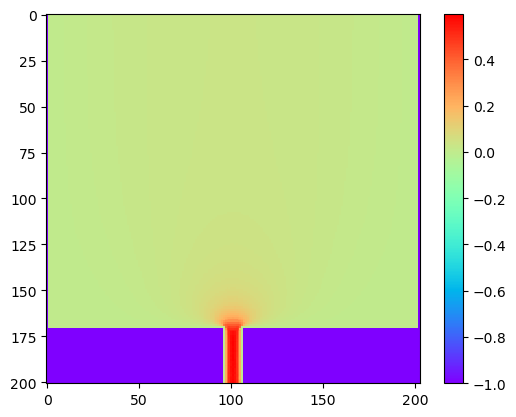

относительная ошибка


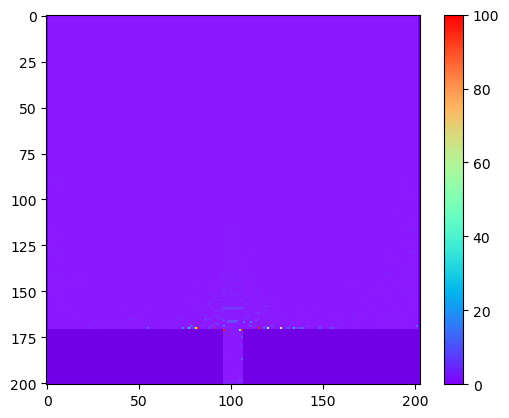

абсолютная ошибка


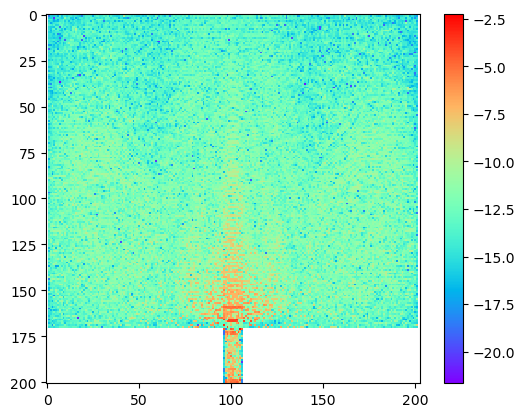

34500
0.14831497780520786


In [160]:
err(empty_matrix, full_matrix, array2)

C:\Users\190782\AppData\Local\Temp\ipykernel_17432\86336504.py:17: RuntimeWarning: divide by zero encountered in log
  trx_abs[i, j] = np.log(abs_err)


Predicted


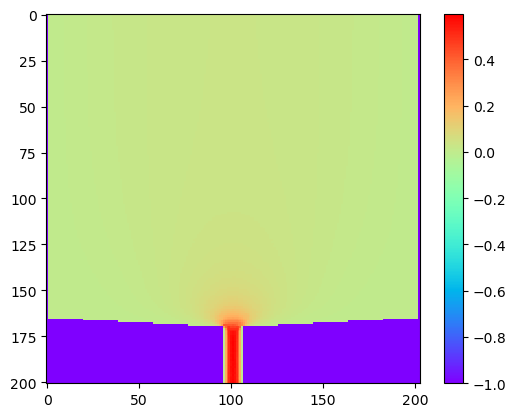

относительная ошибка


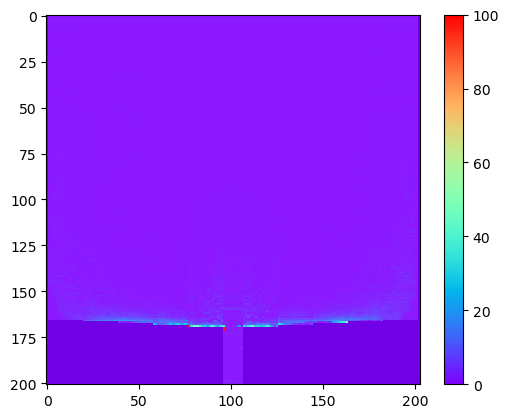

абсолютная ошибка


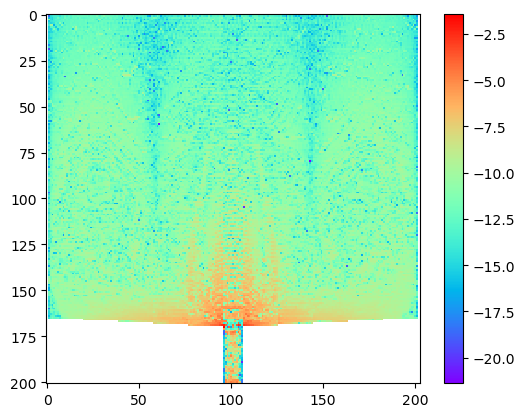

33930
0.8500853767187316


In [166]:
err(empty_matrix, full_matrix, array2)

Predicted


C:\Users\190782\AppData\Local\Temp\ipykernel_17432\1717299651.py:17: RuntimeWarning: divide by zero encountered in log
  trx_abs[i, j] = np.log(abs_err)


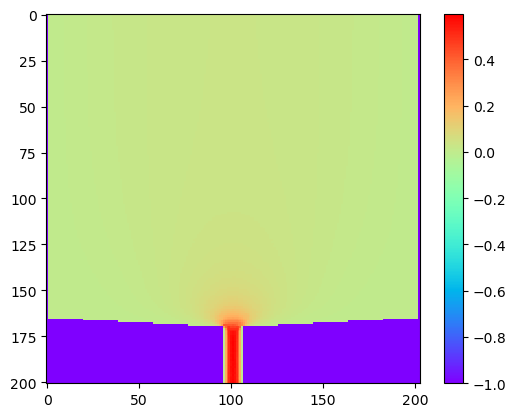

относительная ошибка


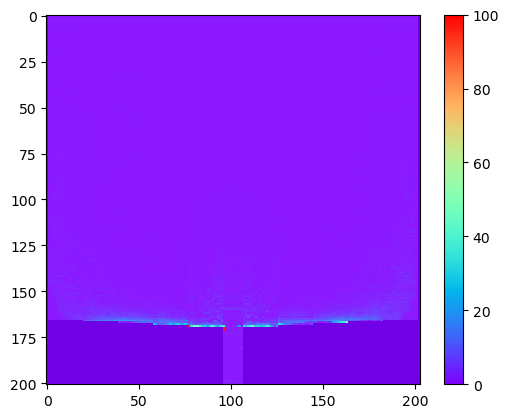

абсолютная ошибка


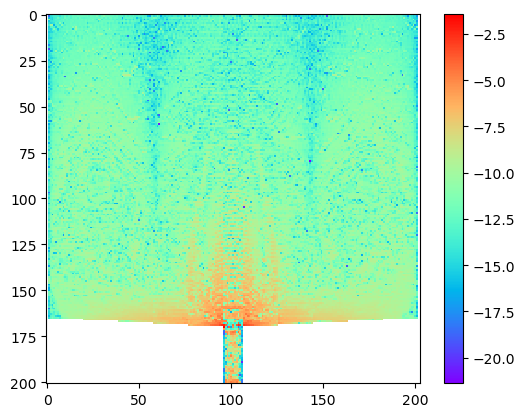

33930
0.8500853767187316


In [164]:
array2 = process_matrix(full_matrix, empty_matrix, model)
err(empty_matrix, full_matrix, array2)

C:\Users\190782\AppData\Local\Temp\ipykernel_17432\86336504.py:17: RuntimeWarning: divide by zero encountered in log
  trx_abs[i, j] = np.log(abs_err)


Predicted


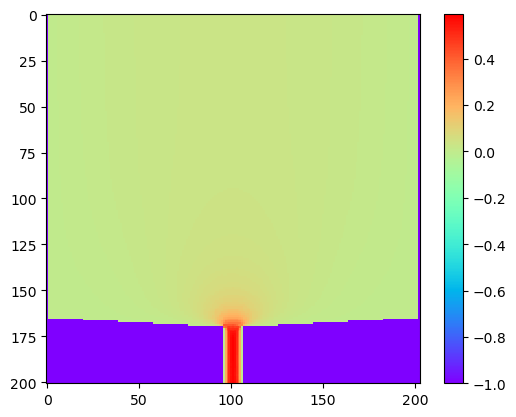

относительная ошибка


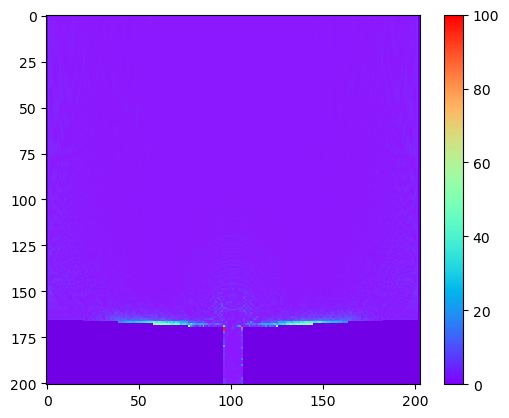

абсолютная ошибка


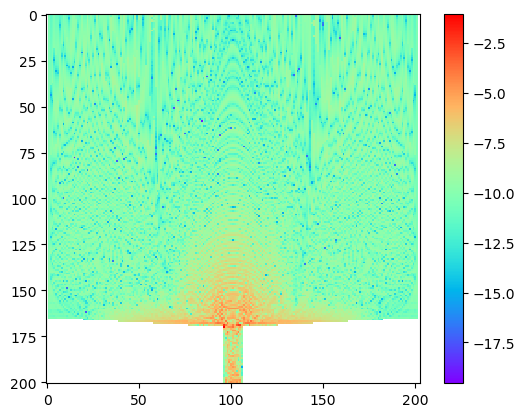

33930
1.2124642446362486


In [178]:
array3 = process_matrixxgb(full_matrix, empty_matrix, modelxgb)
err(empty_matrix, full_matrix, array3)

Predicted


C:\Users\190782\AppData\Local\Temp\ipykernel_17432\1717299651.py:17: RuntimeWarning: divide by zero encountered in log
  trx_abs[i, j] = np.log(abs_err)


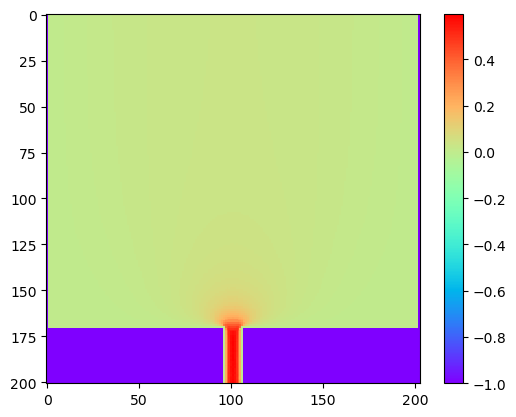

относительная ошибка


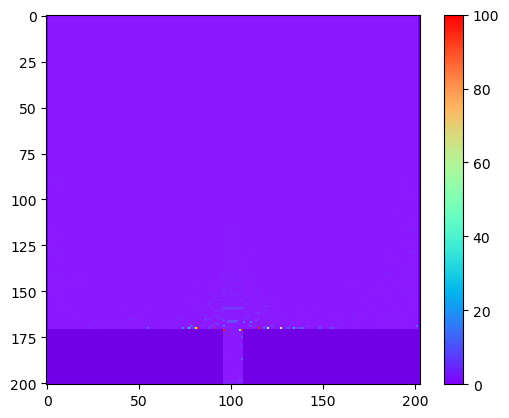

абсолютная ошибка


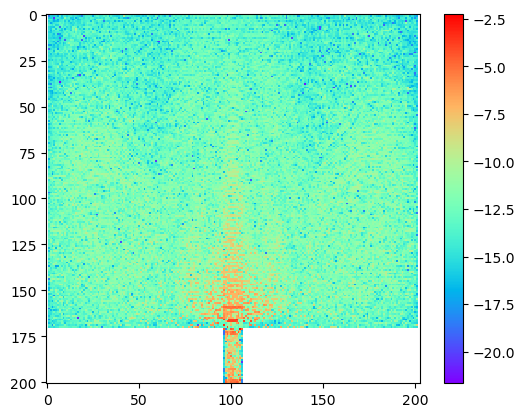

34500
0.14831497780520786


In [103]:
array2 = process_matrix(full_matrix, empty_matrix, model)

err(empty_matrix, full_matrix, array2)



In [182]:
emp = empty_matrix.copy()
it = np.nditer(emp, flags=['multi_index'], op_flags=['readwrite'], order='C')
max_width = max_width_spinneret(emp)
while not it.finished:
    # Получаем текущий индекс
    i, j = it.multi_index

    if emp[i, j] != -1:
        width_of_row = width_row(emp, i)
        length_to_element = length_to_elements(emp, i, j)
        width_of_previous_row = width_row(emp, i-1)
        hgt_c = heigh_of_col(mrx, j) 
        # Проверяем, что матрица 2x3 целиком помещается внутри массива
        if i - 1 >= 0 and j - 1 >= 0 and j + 1 < emp.shape[1]:
            # Выполняем операции над матрицей 3x3
            submatrix = emp[i - 1 : i + 1, j - 1 : j + 2]
            # Ваш код для обработки submatrix
                            
            outer = []
            d4_to_d1 = width_of_previous_row / max_width
            d2_to_d1 = width_of_row / max_width
            d3_to_d2 = length_to_element / width_of_row
            dyn_dy = (i + 1) / hgt_c 
            for x_offset, y_offset in [(0, 0), (0, 1), (0, 2)]:
                outer_value = submatrix[x_offset, y_offset]
                outer.append(outer_value)

            outer.append(d2_to_d1)
            outer.append(d3_to_d2)
            outer.append(d4_to_d1)    
            outer.append(dyn_dy)

            
            predicted_value = model.predict(outer)               
            emp[i, j] = predicted_value
    


        # Переходим к следующему элементу с учетом шага матрицы 3x3
    it.iternext()


    

In [179]:
emp = empty_matrix.copy()
it = np.nditer(emp, flags=['multi_index'], op_flags=['readwrite'], order='C')
max_width = max_width_spinneret(emp)
while not it.finished:
    # Получаем текущий индекс
    i, j = it.multi_index

    if emp[i, j] != -1:
        width_of_row = width_row(emp, i)
        length_to_element = length_to_elements(emp, i, j)
        width_of_previous_row = width_row(emp, i-1)
        hgt_c = heigh_of_col(mrx, j) 
        # Проверяем, что матрица 2x3 целиком помещается внутри массива
        if i - 1 >= 0 and j - 1 >= 0 and j + 1 < emp.shape[1]:
            # Выполняем операции над матрицей 3x3
            submatrix = emp[i - 1 : i + 1, j - 1 : j + 2]
            # Ваш код для обработки submatrix
                            
            outer = []
            d4_to_d1 = width_of_previous_row / max_width
            d2_to_d1 = width_of_row / max_width
            d3_to_d2 = length_to_element / width_of_row
            dyn_dy = (i + 1) / hgt_c 
            for x_offset, y_offset in [(0, 0), (0, 1), (0, 2)]:
                outer_value = submatrix[x_offset, y_offset]
                outer.append(outer_value)

            outer.append(d2_to_d1)
            outer.append(d3_to_d2)
            outer.append(d4_to_d1)    
            outer.append(dyn_dy)
            outer_transposed = np.array(outer).reshape(1, -1)
            columns = ['v1','v2','v3', 'd2_d1', 'd3_d2', 'd4_d1', 'dyn_dy',]
            # Создание DataFrame с использованием транспонированного списка
            df = pd.DataFrame(outer_transposed, columns=columns)

            predicted_value = modelxgb.predict(df)                         
            emp[i, j] = predicted_value
    


        # Переходим к следующему элементу с учетом шага матрицы 3x3
    it.iternext()

Predicted


C:\Users\190782\AppData\Local\Temp\ipykernel_17432\86336504.py:73: RuntimeWarning: divide by zero encountered in log
  trx_abs[i, j] = np.log(abs_err)


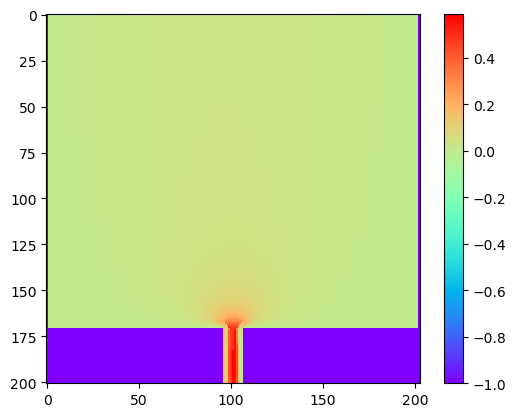

относительная ошибка


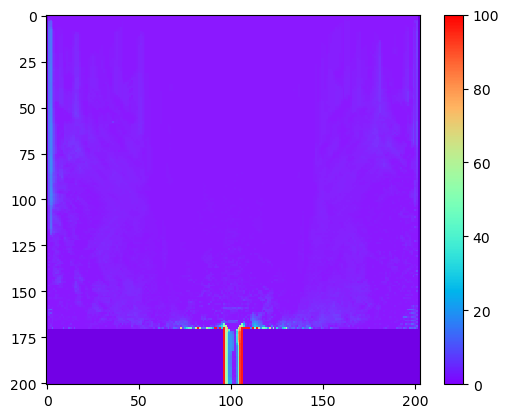

абсолютная ошибка


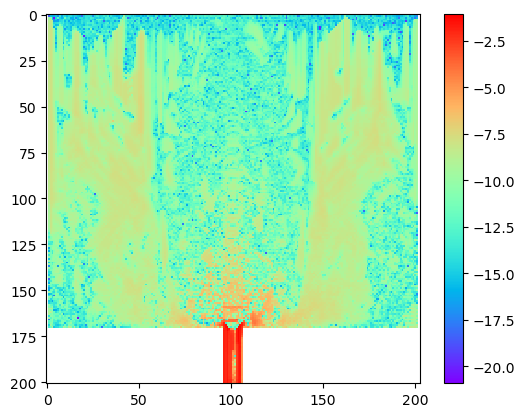

34500
9.3143316595306


In [183]:
err_real(empty_matrix, full_matrix, emp)